# Monte Carlo Tree Search (MCTS)

In [1]:
from maMDP.agents import Agent
from maMDP.mdp import SquareGridMDP, MDP
from maMDP.environments import Environment
from maMDP.algorithms.action_selection import SoftmaxActionSelector, MaxActionSelector
from maMDP.algorithms.mcts import MCTS
from maMDP.algorithms.dynamic_programming import ValueIteration
import numpy as np
import matplotlib.pyplot as plt

## Create an environment

This will be a simple square grid MDP with a single agent. MCTS is probably a little excessive for this problem (it excels in larger, more complicated MDPs), but it will serve to demonstrate how it works.

In [2]:
new_agent = Agent('testAgent', algorithm=MCTS)

grid_shape = (15, 15)
features = np.zeros((2, np.product(grid_shape)))
features[0, 220:] = 1
features[0, 205:210] = 1

new_mdp = SquareGridMDP(shape=grid_shape, features=features)

new_env = Environment(new_mdp, {new_agent: (2, [1, 0, 0], [])})

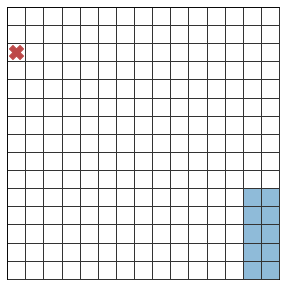

In [3]:
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, agent_plotting_kwargs={'s': 200}, agent_colours={'testAgent': '#bd4848'})

The agent values the blue feature shown in the bottom right corner.

## Determine action values

This uses the MCTS algorithm to identify the action from the current state with the highest value.

In [4]:
new_env.reset()
new_env.fit('testAgent')

C:\Users\tobyw\OneDrive-Caltech\maMDP\maMDP\algorithms\action_selection.py:75: RuntimeWarning: Mean of empty slice
  nan_states = np.isnan(np.nanmean(q_values, axis=1))
C:\Users\tobyw\OneDrive-Caltech\maMDP\maMDP\algorithms\action_selection.py:39: RuntimeWarning: Mean of empty slice
  nan_states = np.isnan(np.nanmean(q_values, axis=1))


## Take a step

Here we select the action with the highest value and taking that action, moving one square along.

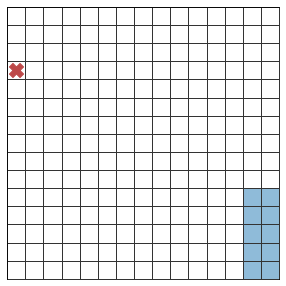

In [5]:
new_env.step('testAgent')
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, agent_plotting_kwargs={'s': 200}, agent_colours={'testAgent': '#bd4848'})

## Take a second step

The MCTS algorithm is an __online__ planning algorithm. This means it's not solving the entire MDP (like dynamic programming algorithms), but is trying to estimate the value of actions that can be taken from the current state only.

If we fit the algorithm in state 1, then take an action to move to state 2, we won't be able to move from state 2 without first fitting the algorithm again to figure out the best action to take.

If we try it here, it'll give an error.

In [6]:
new_env.step('testAgent')

ValueError: No valid action for this state. State action values for the current state may not have been estimated yet.

## Taking multiple steps

If we want to take multiple steps in the environment, this causes a problem. To enable this, we cant use the `refit` argument in the `.step_multi()` method. This will refit the algorithm before every step.

It's also sometimes nice to see the progress of the agent, and we can enable a progress bar by using `progressbar=True`.

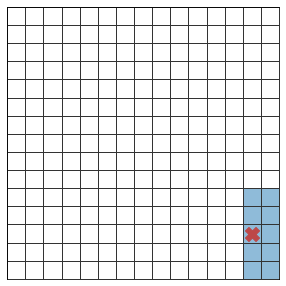

In [7]:
new_env.reset()
new_env.step_multi('testAgent', 25, refit=True, progressbar=True)
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, agent_plotting_kwargs={'s': 200}, agent_colours={'testAgent': '#bd4848'})

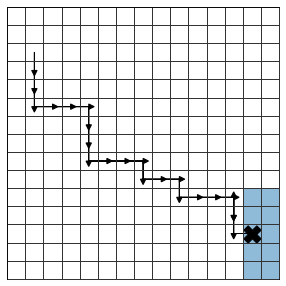

In [8]:
trajectory = new_env.get_agent_position_history('testAgent')
ax = new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, agent_plotting_kwargs={'s': 300})
new_env.plot_trajectory(trajectory, ax)